# Bias vs. Variance

When a learning algorithm doesn't work well it may be due because we have a high bias problem (underfitting) or a high variance problem (overfitting).

## 1. Diagnosing Bias vs. Variance

Let's take the data examples from before:

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Data
x = np.array([1, 1.5, 2, 3, 5])
y = np.array([1, 2, 3, 3.5, 4])

In [3]:
X1 = np.concatenate([np.array([x**i]).T for i in range(2)], axis=1)
theta1 = np.linalg.solve(X1.T.dot(X1), X1.T.dot(y))
theta1

array([1.0125, 0.675 ])

In [4]:
X2 = np.concatenate([np.array([x**i]).T for i in range(3)], axis=1)
theta2 = np.linalg.solve(X2.T.dot(X2), X2.T.dot(y))
theta2

array([-1.07295285,  2.48362283, -0.29528536])

In [5]:
X4 = np.concatenate([np.array([x**i]).T for i in range(5)], axis=1)
theta4 = np.linalg.solve(X4.T.dot(X4), X4.T.dot(y))
theta4

array([ 2.21428572, -5.53571429,  6.05952381, -1.92857143,  0.19047619])

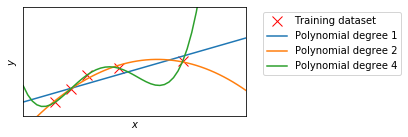

In [6]:
# Draw some data
plt.figure(figsize=(4, 2))
plt.plot(x, y, 'rx', ms=10, label='Training dataset')
x_fit = np.linspace(0, 7)
X1_fit = np.concatenate([np.array([x_fit**i]).T for i in range(2)], axis=1)
X2_fit = np.concatenate([np.array([x_fit**i]).T for i in range(3)], axis=1)
X4_fit = np.concatenate([np.array([x_fit**i]).T for i in range(5)], axis=1)
y1 = X1_fit.dot(theta1)
y2 = X2_fit.dot(theta2)
y4 = X4_fit.dot(theta4)
plt.plot(x_fit, y1, label='Polynomial degree 1')
plt.plot(x_fit, y2, label='Polynomial degree 2')
plt.plot(x_fit, y4, label='Polynomial degree 4')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 7, 0, 8])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

- We can see that the linear hypothesis "underfits" the data (high bias):
    $$
    h^{1}_{\theta}(x) = \theta_0 + \theta_1 x,
    $$

- The quadratic polynomial works pretty well:
    $$
    h^{2}_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2,
    $$

- The 4th degree polynomial exactly fits all the points. It does a very good job fitting the training set, but the curve does not follow the trend at all. It "overfits" the data (high variance):
    $$
    h^{3}_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4.
    $$

Now, let's say that we have the following validation dataset:

In [7]:
x_cv = np.array([2.8, 4.6, 5.2])
y_cv = np.array([3.8, 3.9, 4])

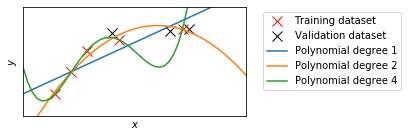

In [8]:
# Draw some data
plt.figure(figsize=(4, 2))
plt.plot(x, y, 'rx', ms=10, label='Training dataset')
plt.plot(x_cv, y_cv, 'kx', ms=10, label='Validation dataset')
x_fit = np.linspace(0, 7)
X1_fit = np.concatenate([np.array([x_fit**i]).T for i in range(2)], axis=1)
X2_fit = np.concatenate([np.array([x_fit**i]).T for i in range(3)], axis=1)
X4_fit = np.concatenate([np.array([x_fit**i]).T for i in range(5)], axis=1)
y1 = X1_fit.dot(theta1)
y2 = X2_fit.dot(theta2)
y4 = X4_fit.dot(theta4)
plt.plot(x_fit, y1, label='Polynomial degree 1')
plt.plot(x_fit, y2, label='Polynomial degree 2')
plt.plot(x_fit, y4, label='Polynomial degree 4')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 7, 0, 5])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

Now, let's evaluate the cost function on the training set and the validation set, for the three polynomial degrees:

$$
J_{train}(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}),
$$

$$
J_{cv}(\theta) = \frac{1}{2m_{cv}} \sum_{i=1}^{m_{cv}}(h_{\theta}(x_{cv}^{(i)}) - y_{cv}^{(i)}),
$$

In [9]:
# Cost function
def J(theta, X, y):
    m = len(y)
    return np.linalg.norm(X.dot(theta) - y)**2 / (2 * m)

In [10]:
# X for Validation
X_cv1 = np.concatenate([np.array([x_cv**i]).T for i in range(2)], axis=1)
X_cv2 = np.concatenate([np.array([x_cv**i]).T for i in range(3)], axis=1)
X_cv4 = np.concatenate([np.array([x_cv**i]).T for i in range(5)], axis=1)

In [11]:
J_train1 = J(theta1, X1, y)
J_train2 = J(theta2, X2, y)
J_train4 = J(theta4, X4, y)
J_cv1 = J(theta1, X_cv1, y_cv)
J_cv2 = J(theta2, X_cv2, y_cv)
J_cv4 = J(theta4, X_cv4, y_cv)

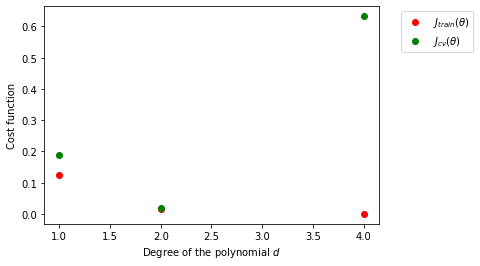

In [12]:
# Draw J_test and J_cv wrt d
plt.plot([1, 2, 4], [J_train1, J_train2, J_train4], 'or', label=r'$J_{train}(\theta)$')
plt.plot([1, 2, 4], [J_cv1, J_cv2, J_cv4], 'og', label=r'$J_{cv}(\theta)$')
plt.xlabel('Degree of the polynomial $d$')
plt.ylabel('Cost function')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

This simple graph represents well the shapes of $J_{train}$ and $J_{cv}$ when the polynomial degree varies.

1. If both $J_{train}$ and $J_{cv}$ are high ($d=1$), then we have a bias problem: Underfit.
1. If $J_{train} << J_{cv}$ and $J_{train}$ is actually low ($d=4$), then we have a variance problem: Overfit.

## 2. Regularization and Bias/Variance

We saw that including regularization terms in the cost function helps preventing overfitting. What is the effect of this parameter in the Bias/Variance trade-off?

For this example, let's use the same data points as above, and the 4-th order polynomial as the hypothesis:

$$
h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4.
$$

In [13]:
# Matrix A
A = np.block([[np.zeros((1, 1)), np.zeros((1, 4))],
              [np.zeros((4, 1)), np.eye(4)]])

In [14]:
# lambda=10000
l = 1e4
theta4_10000 = np.linalg.solve(X4.T.dot(X4) + l * A, X4.T.dot(y))
theta4_10000

array([2.26420581e+00, 2.09156894e-04, 7.11498625e-04, 1.72143317e-03,
       2.56028374e-03])

In [15]:
# lambda=0.3
l = 0.3
theta4_03 = np.linalg.solve(X4.T.dot(X4) + l * A, X4.T.dot(y))
theta4_03

array([ 0.39693095,  0.44421803,  0.61098893, -0.16216692,  0.01018527])

In [16]:
# lambda=0.0001
l = 0.0001
theta4_0001 = np.linalg.solve(X4.T.dot(X4) + l * A, X4.T.dot(y))
theta4_0001

array([ 1.05742231, -3.16760038,  4.43189706, -1.48259551,  0.14929182])

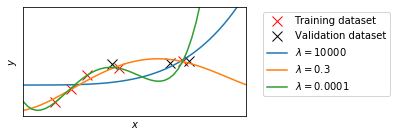

In [17]:
# Draw some data
plt.figure(figsize=(4, 2))
plt.plot(x, y, 'rx', ms=10, label='Training dataset')
plt.plot(x_cv, y_cv, 'kx', ms=10, label='Validation dataset')
X4_fit = np.concatenate([np.array([x_fit**i]).T for i in range(5)], axis=1)
y1 = X4_fit.dot(theta4_10000)
y2 = X4_fit.dot(theta4_03)
y4 = X4_fit.dot(theta4_0001)
plt.plot(x_fit, y1, label=r'$\lambda=10000$')
plt.plot(x_fit, y2, label=r'$\lambda=0.3$')
plt.plot(x_fit, y4, label=r'$\lambda=0.0001$')
plt.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    labelleft=False,
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis([0, 7, 0, 8])
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

Here we can see that:

- Large $\lambda$ "underfits" the data (high bias).

- Intermediate $\lambda$ is just right.

- Very small $\lambda$ "overfits" the data (high variance).

To evaluate the selection of $\lambda$ according to the cost function, we will consider the unregularized cost function to evaluate the datasets:

In [18]:
# Cost function
def J(theta, X, y):
    m = len(y)
    return np.linalg.norm(X.dot(theta) - y)**2 / (2 * m)

In [19]:
J_train1 = J(theta4_0001, X4, y)
J_train2 = J(theta4_03, X4, y)
J_train4 = J(theta4_10000, X4, y)
J_cv1 = J(theta4_0001, X_cv4, y_cv)
J_cv2 = J(theta4_03, X_cv4, y_cv)
J_cv4 = J(theta4_10000, X_cv4, y_cv)

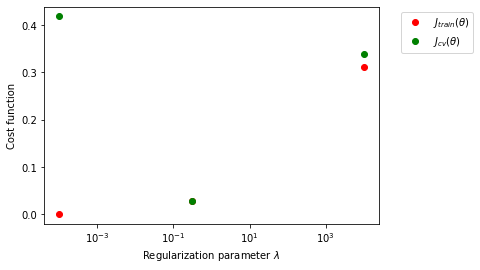

In [20]:
# Draw J_test and J_cv wrt d
plt.semilogx([0.0001, 0.3, 10000], [J_train1, J_train2, J_train4], 'or', label=r'$J_{train}(\theta)$')
plt.semilogx([0.0001, 0.3, 10000], [J_cv1, J_cv2, J_cv4], 'og', label=r'$J_{cv}(\theta)$')
plt.xlabel('Regularization parameter $\lambda$')
plt.ylabel('Cost function')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

Again, this simple graph represents well the shapes of $J_{train}$ and $J_{cv}$ when the regularization parameter varies.

In both cases, it is always a good approach to **find the hyperparameters to minimize the cost function evaluated on the cross validation set.**

## 3. Learning curves

These are often a very useful thing to plot, and help to diagnose high bias, or high variance.

They consist to plot the cost functions over the train dataset and the validation dataset as a function of the number of training samples $m$:

$$
J_{train}(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}),
$$

$$
J_{cv}(\theta) = \frac{1}{2m_{cv}} \sum_{i=1}^{m_{cv}}(h_{\theta}(x_{cv}^{(i)}) - y_{cv}^{(i)}),
$$

Tipically in a **high bias case**:
- For small training sizes, $J_{train}$ will be small and $J_{cv}$ will be large.
- For large training sizes, both $J_{train}$ and $J_{cv}$ will be large, with $J_{train} \approx J_{cv}$.

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/bpAOvt9uEeaQlg5FcsXQDA_ecad653e01ee824b231ff8b5df7208d9_2-am.png?expiry=1615507200000&hmac=B_zxIWKyRde01XnX6wwINQHb0MSEJV2Dt2FU9ViBpoo)

Tipically in a **high variance case**:
- For small training sizes, $J_{train}$ will be small and $J_{cv}$ will be large.
- For large training sizes, both $J_{train}$ increases and $J_{cv}$ decreases continuously. However, there's a significant gap between with $J_{train}$ and $J_{cv}$.

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/vqlG7t9uEeaizBK307J26A_3e3e9f42b5e3ce9e3466a0416c4368ee_ITu3antfEeam4BLcQYZr8Q_37fe6be97e7b0740d1871ba99d4c2ed9_300px-Learning1.png?expiry=1615507200000&hmac=ANjXc_gwPReqAsf2PvDWZZsX5Gp1yWTZ-z-DV95HlDg)

Then, with respect to our solutions to bad performance:

- Get more training examples: Fixes high variance.
- Try smaller sets of features: Fixes high variance.
- Try getting additional features: Fixes high bias.
- Try adding polynomial features: Fixes high bias.
- Try increasing $\lambda$: Fixes high variance.
- Try decreasing $\lambda$: Fixes high bias.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>